Source: http://blog.yhat.com/posts/predicting-customer-churn-with-sklearn.html


"Churn Rate" is a business term describing the rate at which customers leave or cease paying for a product or service. It's a critical figure in many businesses, as it's often the case that acquiring new customers is a lot more costly than retaining existing ones (in some cases, 5 to 20 times more expensive).

Understanding what keeps customers engaged, therefore, is incredibly valuable, as it is a logical foundation from which to develop retention strategies and roll out operational practices aimed to keep customers from walking out the door. Consequently, there's growing interest among companies to develop better churn-detection techniques, leading many to look to data mining and machine learning for new and creative approaches.

Predicting churn is particularly important for businesses w/ subscription models such as cell phone, cable, or merchant credit card processing plans. But modeling churn has wide reaching applications in many domains. For example, casinos have used predictive models to predict ideal room conditions for keeping patrons at the blackjack table and when to reward unlucky gamblers with front row seats to Celine Dion. Similarly, airlines may offer first class upgrades to complaining customers. The list goes on.

This is a post about modeling customer churn using Python.



In [0]:
#Code Source: https://towardsdatascience.com/churn-prediction-770d6cb582a5

In [5]:
# Standard Python Notebook Settings
%config IPCompleter.greedy=True
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pprint import pprint
import sklearn.datasets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd 
pd.option_context('display.max_rows', None, 'display.max_columns', None)
import sys
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=np.inf)

In [6]:
df = pd.read_csv('https://github.com/bhagi8289/mumbai_workshop/raw/master/churn.csv')
df.sample(5)

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
4046,No,73,no,yes,33,129.8,112,22.07,225.3,96,19.15,262.5,104,11.81,8.6,3,2.32,1
993,No,70,no,no,0,126.3,99,21.47,141.6,106,12.04,255.9,96,11.52,9.6,2,2.59,0
4850,No,121,no,no,0,162.4,87,27.61,285.2,104,24.24,117.4,125,5.28,5.8,5,1.57,2
2511,No,169,no,no,0,147.2,115,25.02,161.9,123,13.76,142.1,103,6.39,7.2,6,1.94,3
4270,No,113,no,no,0,203.4,85,34.58,219.8,140,18.68,240.0,107,10.80,8.3,5,2.24,1


In [10]:
df.isnull().count()

churn                         5000
accountlength                 5000
internationalplan             5000
voicemailplan                 5000
numbervmailmessages           5000
totaldayminutes               5000
totaldaycalls                 5000
totaldaycharge                5000
totaleveminutes               5000
totalevecalls                 5000
totalevecharge                5000
totalnightminutes             5000
totalnightcalls               5000
totalnightcharge              5000
totalintlminutes              5000
totalintlcalls                5000
totalintlcharge               5000
numbercustomerservicecalls    5000
dtype: int64

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
accountlength,5000.0,100.258600,39.694560,1.0,73.000,100.00,127.00,243.00
numbervmailmessages,5000.0,7.755200,13.546393,0.0,0.000,0.00,17.00,52.00
totaldayminutes,5000.0,180.288900,53.894699,0.0,143.700,180.10,216.20,351.50
totaldaycalls,5000.0,100.029400,19.831197,0.0,87.000,100.00,113.00,165.00
totaldaycharge,5000.0,30.649668,9.162069,0.0,24.430,30.62,36.75,59.76
totaleveminutes,5000.0,200.636560,50.551309,0.0,166.375,201.00,234.10,363.70
totalevecalls,5000.0,100.191000,19.826496,0.0,87.000,100.00,114.00,170.00
totalevecharge,5000.0,17.054322,4.296843,0.0,14.140,17.09,19.90,30.91
totalnightminutes,5000.0,200.391620,50.527789,0.0,166.900,200.40,234.70,395.00
totalnightcalls,5000.0,99.919200,19.958686,0.0,87.000,100.00,113.00,175.00


In [12]:
df.describe(include=['object'])

,churn,internationalplan,voicemailplan
count,5000,5000,5000
unique,2,2,2
top,No,no,no
freq,4293,4527,3677


In [13]:
df.notnull().count() 

churn                         5000
accountlength                 5000
internationalplan             5000
voicemailplan                 5000
numbervmailmessages           5000
totaldayminutes               5000
totaldaycalls                 5000
totaldaycharge                5000
totaleveminutes               5000
totalevecalls                 5000
totalevecharge                5000
totalnightminutes             5000
totalnightcalls               5000
totalnightcharge              5000
totalintlminutes              5000
totalintlcalls                5000
totalintlcharge               5000
numbercustomerservicecalls    5000
dtype: int64

In [0]:
#df = df.dropna(how="all")

In [0]:
df1 = df.copy()

In [0]:
df1 = df1[~df1.duplicated()]

In [16]:
df1.count()

churn                         5000
accountlength                 5000
internationalplan             5000
voicemailplan                 5000
numbervmailmessages           5000
totaldayminutes               5000
totaldaycalls                 5000
totaldaycharge                5000
totaleveminutes               5000
totalevecalls                 5000
totalevecharge                5000
totalnightminutes             5000
totalnightcalls               5000
totalnightcharge              5000
totalintlminutes              5000
totalintlcalls                5000
totalintlcharge               5000
numbercustomerservicecalls    5000
dtype: int64

In [17]:
df1.dtypes

churn                          object
accountlength                   int64
internationalplan              object
voicemailplan                  object
numbervmailmessages             int64
totaldayminutes               float64
totaldaycalls                   int64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                   int64
totalevecharge                float64
totalnightminutes             float64
totalnightcalls                 int64
totalnightcharge              float64
totalintlminutes              float64
totalintlcalls                  int64
totalintlcharge               float64
numbercustomerservicecalls      int64
dtype: object

In [0]:
target = 'churn'
numerical_features= ['accountlength','numbervmailmessages','totaldayminutes','totaldaycalls','totaldaycharge','totaleveminutes','totalevecalls','totalevecharge','totalnightminutes','totalnightcalls','totalnightcharge','totalintlminutes','totalintlcalls','totalintlcharge','numbercustomerservicecalls']
categorical_features = ['internationalplan','voicemailplan']

In [19]:
df1[numerical_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
accountlength,5000.0,100.258600,39.694560,1.0,73.000,100.00,127.00,243.00
numbervmailmessages,5000.0,7.755200,13.546393,0.0,0.000,0.00,17.00,52.00
totaldayminutes,5000.0,180.288900,53.894699,0.0,143.700,180.10,216.20,351.50
totaldaycalls,5000.0,100.029400,19.831197,0.0,87.000,100.00,113.00,165.00
totaldaycharge,5000.0,30.649668,9.162069,0.0,24.430,30.62,36.75,59.76
totaleveminutes,5000.0,200.636560,50.551309,0.0,166.375,201.00,234.10,363.70
totalevecalls,5000.0,100.191000,19.826496,0.0,87.000,100.00,114.00,170.00
totalevecharge,5000.0,17.054322,4.296843,0.0,14.140,17.09,19.90,30.91
totalnightminutes,5000.0,200.391620,50.527789,0.0,166.900,200.40,234.70,395.00
totalnightcalls,5000.0,99.919200,19.958686,0.0,87.000,100.00,113.00,175.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8155a44588>,
      dtype=object)

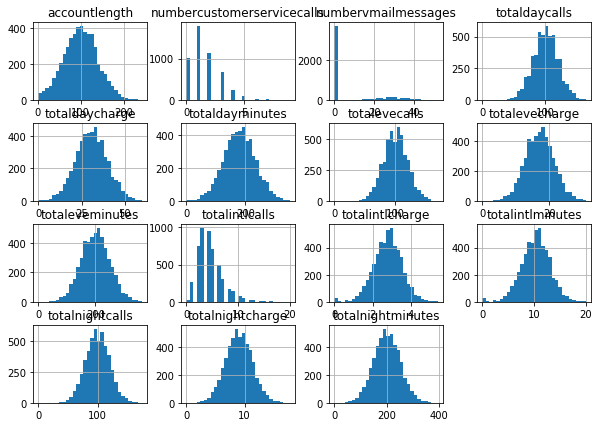

In [20]:
df1[numerical_features].hist(bins=30, figsize=(10, 7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f81556f2470>,
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f81556f2470>,
      dtype=object)

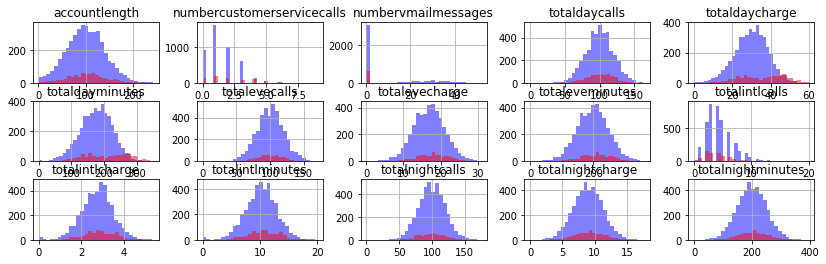

In [21]:
  # Plot with respect to total charges
df = df1
fig, ax = plt.subplots(3, 5, figsize=(14, 4))
df[df.churn == "No"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.churn == "Yes"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'internationalplan')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'voicemailplan')

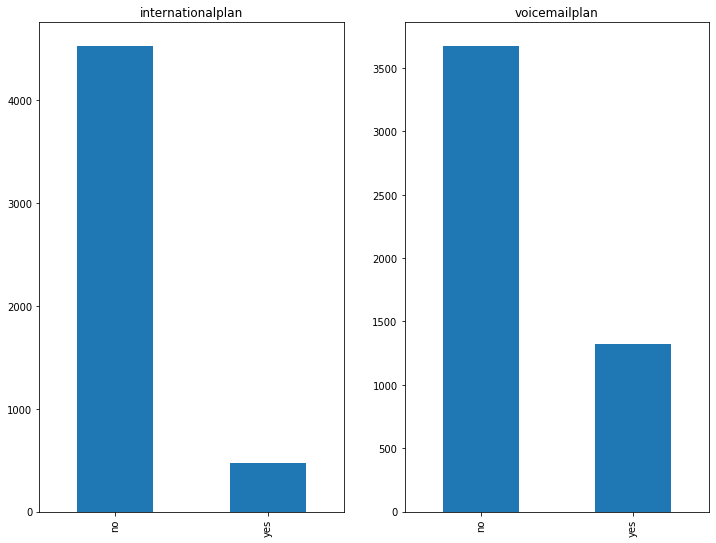

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 9))
categorical_features = ['internationalplan','voicemailplan']
df['internationalplan'].value_counts().plot('bar',ax=ax[0]).set_title('internationalplan')
df['voicemailplan'].value_counts().plot('bar',ax=ax[1]).set_title('voicemailplan')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'not churned customers with internationalplan')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'churned customers with internationalplan')

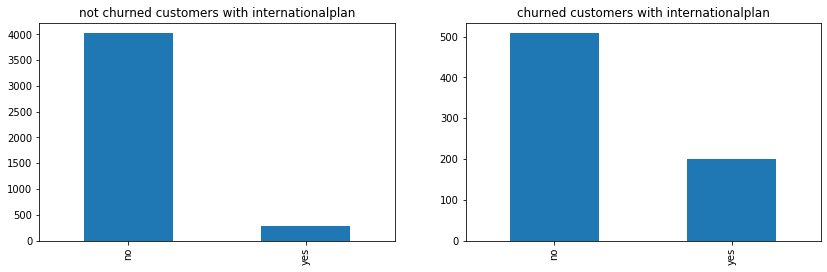

In [23]:
feature = 'internationalplan'
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.churn == "No"][feature].value_counts().plot('bar', ax=ax[0]).set_title('not churned customers with internationalplan')
df[df.churn == "Yes"][feature].value_counts().plot('bar', ax=ax[1]).set_title('churned customers with internationalplan')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'not churned customers with voicemailplan')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'churned customers with voicemailplan')

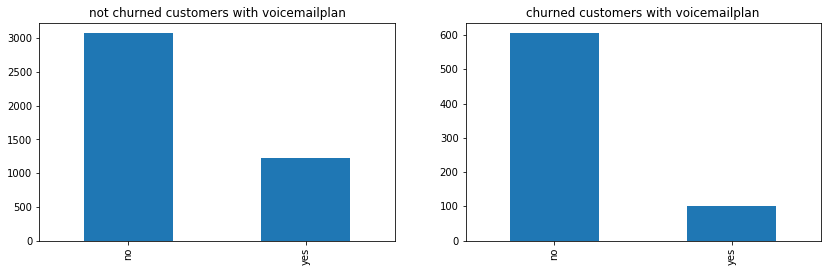

In [24]:
feature = 'voicemailplan'
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.churn == "No"][feature].value_counts().plot('bar', ax=ax[0]).set_title('not churned customers with voicemailplan')
df[df.churn == "Yes"][feature].value_counts().plot('bar', ax=ax[1]).set_title('churned customers with voicemailplan')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'churned')

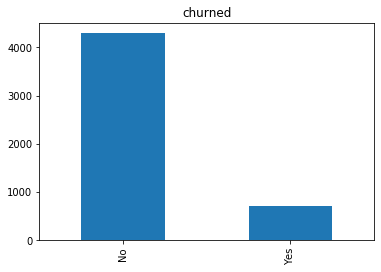

In [25]:
df[target].value_counts().plot('bar').set_title('churned')

In [0]:
# Convert Categorical Features to Numeric features using encoding or binary classification

In [0]:
df[target].unique()

In [28]:
df[target].value_counts()

No     4293
Yes     707
Name: churn, dtype: int64

In [0]:
df.churn = df.churn.map(dict(Yes=1, No=0))

In [32]:
df[target].value_counts()

0    4293
1     707
Name: churn, dtype: int64

Convert other two categorical **variables**

In [33]:
df[categorical_features[0]].value_counts()

no     4527
yes     473
Name: internationalplan, dtype: int64

In [34]:
df[categorical_features[1]].value_counts()

no     3677
yes    1323
Name: voicemailplan, dtype: int64

In [35]:
categorical_features = ['internationalplan','voicemailplan']
df.internationalplan = df.internationalplan.map(dict(yes=1, no=0))
df['internationalplan'].value_counts()

0    4527
1     473
Name: internationalplan, dtype: int64

In [36]:
df.voicemailplan = df.voicemailplan.map(dict(yes=1, no=0))
df['voicemailplan'].value_counts()

0    3677
1    1323
Name: voicemailplan, dtype: int64

In [38]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
churn,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
accountlength,128.00,107.00,137.00,84.00,75.00,118.00,121.00,147.00,117.00,141.00,65.00,74.00,168.00,95.00,62.00,161.00,85.00,93.00,76.00,73.00,147.00,77.00,130.00,111.00,132.00,174.00,57.00,54.00,20.00,49.00,142.00,75.00,172.00,12.00,57.00,72.00,36.00,78.00,136.00,149.00,...,128.00,71.00,91.00,47.00,126.00,92.00,36.00,122.00,117.00,131.00,133.00,128.00,81.00,81.00,96.00,93.00,145.00,53.00,108.00,52.00,73.00,61.00,86.00,137.00,74.00,118.00,125.00,127.00,80.00,150.00,140.00,97.00,83.00,73.00,75.00,50.00,152.00,61.00,109.00,86.00
internationalplan,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
voicemailplan,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
numbervmailmessages,25.00,26.00,0.00,0.00,0.00,0.00,24.00,0.00,0.00,37.00,0.00,0.00,0.00,0.00,0.00,0.00,27.00,0.00,33.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.00,37.00,30.00,0.00,33.00,0.00,...,41.00,0.00,0.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,31.00,0.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,40.00,0.00,0.00,0.00,34.00
totaldayminutes,265.10,161.60,243.40,299.40,166.70,223.40,218.20,157.00,184.50,258.60,129.10,187.70,128.80,156.60,120.70,332.90,196.40,190.70,189.70,224.40,155.10,62.40,183.00,110.40,81.10,124.30,213.00,134.30,190.00,119.30,84.80,226.10,212.00,249.60,176.80,220.00,146.30,130.80,203.90,140.40,...,184.80,123.80,34.50,140.60,150.80,192.10,175.70,93.30,212.10,43.30,173.10,115.40,190.90,234.10,102.10,131.90,135.00,145.00,170.30,188.70,177.20,7.20,181.10,151.80,159.40,226.60,214.70,157.60,157.00,170.00,244.70,252.60,188.30,177.90,170.70,235.70,184.20,140.60,188.80,129.40
totaldaycalls,110.00,123.00,114.00,71.00,113.00,98.00,88.00,79.00,97.00,84.00,137.00,127.00,96.00,88.00,70.00,67.00,139.00,114.00,66.00,90.00,117.00,89.00,112.00,103.00,86.00,76.00,115.00,73.00,109.00,117.00,95.00,105.00,121.00,118.00,94.00,80.00,128.00,64.00,106.00,94.00,...,76.00,130.00,85.00,114.00,105.00,87.00,69.00,109.00,133.00,118.00,126.00,96.00,92.00,105.00,74.00,91.00,122.00,80.00,48.00,99.00,118.00,97.00,124.00,90.00,86.00,99.00,115.00,107.00,101.00,115.00,115.00,89.00,70.00,89.00,101.00,127.00,90.00,89.00,67.00,102.00
totaldaycharge,45.07,27.47,41.38,50.90,28.34,37.98,37.09,26.69,31.37,43.96,21.95,31.91,21.90,26.62,20.52,56.59,33.39,32.42,32.25,38.15,26.37,10.61,31.11,18.77,13.79,21.13,36.21,22.83,32.30,20.28,14.42,38.44,36.04,42.43,30.06,37.40,24.87,22.24,34.66,23.87,...,31.42,21.05,5.87,23.90,25.64,32.66,29.87,15.86,36.06,7.36,29.43,19.62,32.45,39.80,17.36,22.4

In [68]:
# Apply Machine Learning Model
# Convert data from pandas dataframe to numpy array
XY = df.to_numpy()
np.set_printoptions(suppress=True)
XY[1,:]

array([  0.  , 107.  ,   0.  ,   1.  ,  26.  , 161.6 , 123.  ,  27.47,
       195.5 , 103.  ,  16.62, 254.4 , 103.  ,  11.45,  13.7 ,   3.  ,
         3.7 ,   1.  ])

In [69]:
XY.shape

(5000, 18)

In [0]:
X = XY[:,1:18]
y = XY[:,0]

In [71]:
X[1,:]

array([107.  ,   0.  ,   1.  ,  26.  , 161.6 , 123.  ,  27.47, 195.5 ,
       103.  ,  16.62, 254.4 , 103.  ,  11.45,  13.7 ,   3.  ,   3.7 ,
         1.  ])

In [72]:
y[1]

0.0

In [0]:
#Scale the inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [74]:
X[1,:]

array([ 0.16984882, -0.32324017,  1.66712012,  1.3469729 , -0.34680162,
        1.1584221 , -0.34708166, -0.10162098,  0.14169327, -0.10108943,
        1.06899159,  0.1543743 ,  1.06981758,  1.24522677, -0.58423577,
        1.24598231, -0.43667564])

In [75]:
print("Feature space holds %d observations and %d features" %(X.shape))
print("Unique target labels:",np.unique(y))

Feature space holds 5000 observations and 17 features
Unique target labels: [0. 1.]


In [76]:
sum(y)

707.0

In [77]:

# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

# Evaluate using a train and a test set
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model_log = LogisticRegression()
model_log.fit(X_train, Y_train)
result = model_log.score(X_test, Y_test)
print("\nAccuracy: %.2f%%" % (result*100.0))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy: 85.27%


In [80]:
# Two Examples of prediction
# 0,141,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0
# 1,65,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.4,12.7,6,3.43,4
X1 = np.array([141,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0])
X1 = X1.reshape(1,-1)
X1 = scaler.transform(X1)
y1_pred = model_log.predict(X1)
print("Predicted value is: ",y1_pred)
X1 = np.array([65,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.4,12.7,6,3.43,4])
X1 = X1.reshape(1,-1)
X1 = scaler.transform(X1)
y1_pred = model_log.predict(X1)
print("Predicted value is: ",y1_pred)
X2 = XY[:,1:18]
X2 = scaler.transform(X2)

y2_pred = model_log.predict(X2)
i = 0
for i in range(len(y2_pred)):
  if(y2_pred[i] == 0):
    print("index: ",i, "value 0:")
for i in range(len(y2_pred)):
  if(y2_pred[i] == 1):
    print("index: ",i, "value 1:")

Predicted value is:  [0.]
Predicted value is:  [0.]
index:  0 value 0:
index:  1 value 0:
index:  2 value 0:
index:  5 value 0:
index:  6 value 0:
index:  7 value 0:
index:  8 value 0:
index:  9 value 0:
index:  10 value 0:
index:  11 value 0:
index:  12 value 0:
index:  13 value 0:
index:  14 value 0:
index:  16 value 0:
index:  17 value 0:
index:  18 value 0:
index:  19 value 0:
index:  20 value 0:
index:  21 value 0:
index:  22 value 0:
index:  23 value 0:
index:  24 value 0:
index:  25 value 0:
index:  26 value 0:
index:  27 value 0:
index:  28 value 0:
index:  29 value 0:
index:  30 value 0:
index:  31 value 0:
index:  32 value 0:
index:  33 value 0:
index:  34 value 0:
index:  35 value 0:
index:  36 value 0:
index:  37 value 0:
index:  38 value 0:
index:  39 value 0:
index:  40 value 0:
index:  41 value 0:
index:  42 value 0:
index:  43 value 0:
index:  44 value 0:
index:  45 value 0:
index:  46 value 0:
index:  47 value 0:
index:  48 value 0:
index:  49 value 0:
index:  50 value

**Below is left as an exercise**

In [0]:


from sklearn.model_selection import KFold

def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(n_splits=5,shuffle=True,random_state=None)
    y_pred = y.copy()
    #print("kf.split(): ",kf.split(X), "\n")
    i = 0

    # Iterate through folds
    for train_index, test_index in kf.split(X):
        #print("train index: ",train_index," ,test index",test_index,"\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n")
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        print("i : ",i)
        i = i+1 
    return y_pred

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN

def accuracy(y_true,y_pred):
    # NumPy interprets True and False as 1. and 0.
    return np.mean(y_true == y_pred)

print("Accuracy score for Support vector machines:")
y_pred = run_cv(X,y,SVC)
print("total predicted yes: ",np.sum(y_pred),"\n")
print("%.3f" % accuracy(y, y_pred))
print("Accuracy score for Random forest:")
y_pred = run_cv(X,y,RF)
print("total predicted yes: ",np.sum(y_pred),"\n")
print("%.3f" % accuracy(y, y_pred))
print("Accuracy score for K-nearest-neighbors:")
y_pred = run_cv(X,y,KNN)
print("total predicted yes: ",np.sum(y_pred),"\n")
print("%.3f" % accuracy(y, y_pred))

Accuracy score for Support vector machines:
i :  0
i :  1
i :  2
i :  3
i :  4
total predicted yes:  22.0 

0.863
Accuracy score for Random forest:
i :  0
i :  1
i :  2
i :  3
i :  4
total predicted yes:  573.0 

0.960
Accuracy score for K-nearest-neighbors:
i :  0
i :  1
i :  2
i :  3
i :  4
total predicted yes:  300.0 

0.885


Precision and recall
Measurements aren't golden formulas which always spit out high numbers for good models and low numbers for bad ones. Inherently they convey something sentiment about a model's performance, and it's the job of the human designer to determine each number's validity. The problem with accuracy is that outcomes aren't necessarily equal. If my classifier predicted a customer would churn and they didn't, that's not the best but it's forgivable. However, if my classifier predicted a customer would return, I didn't act, and then they churned... that's really bad.

I'll be using another built in scikit-learn function to construction a confusion matrix. A confusion matrix is a way of visualizing predictions made by a classifier and is just a table showing the distribution of predictions for a specific class. The x-axis indicates the true class of each observation (if a customer churned or not) while the y-axis corresponds to the class predicted by the model (if my classifier said a customer would churned or not).

In [0]:
# Python script for confusion matrix creation. 
# Source: https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
#              predicted  predicted 
#  true label 
#  true label 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
actual = y
predicted = run_cv(X,y,SVC)
results = confusion_matrix(actual,predicted) 
print('Support Vector Machine Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y, predicted)) 
print('Report : ')
print(classification_report(actual, predicted)) 

Support Vector Machine Confusion Matrix :
[[4245   48]
 [ 313  394]]
Accuracy Score : 0.9278
Report : 
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      4293
         1.0       0.89      0.56      0.69       707

    accuracy                           0.93      5000
   macro avg       0.91      0.77      0.82      5000
weighted avg       0.93      0.93      0.92      5000



In [0]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22.1)


Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'Confusion matrix, without normalization')

Confusion matrix, without normalization
[[4278   15]
 [ 203  504]]


Text(0.5, 1.0, 'Normalized confusion matrix')

Normalized confusion matrix
[[0.99650594 0.00349406]
 [0.28712871 0.71287129]]


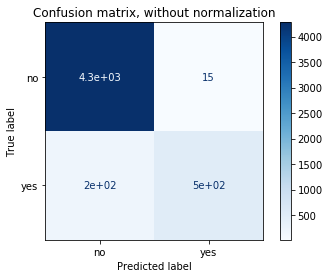

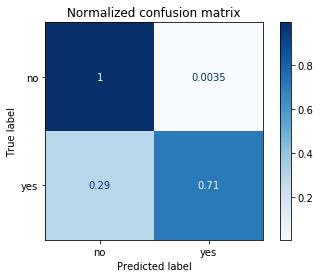

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
classifier = svm.SVC().fit(X, y)
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X, y,
                                 display_labels=['no','yes'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [0]:
# Two Examples of prediction
# 0,141,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0
# 1,65,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.4,12.7,6,3.43,4
X = np.array([135,1,0,30,259.6,90,49,200.0,100,18,300,100,19,14,5,7,2])
X = X.reshape(1,-1)
print("Predicted value is: ",y_pred = run_cv(X,y,RF))

X = np.array([65,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.4,12.7,6,3.43,4])
X = X.reshape(1,-1)
X = XY[:,1:18]
print("Predicted value is: ",classifier.predict(X))

Predicted value is:  [0.]
Predicted value is:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 